In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [ ]:
from retrieval import get_data
df = get_data(fname='stats.html')

In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.DataFrame({'x': np.random.randint(1,500,100),'y':np.random.randint(1,500,100)})

In [4]:
df.head

<bound method NDFrame.head of       x    y
0    41  477
1   438   66
2   465  281
3   356    6
4   383   54
..  ...  ...
95  142  286
96   46  355
97  223  484
98  362  297
99   39  272

[100 rows x 2 columns]>

In [5]:
df.columns

Index(['x', 'y'], dtype='object')

In [6]:
@interact
def show_values_more_than(column=['x','y'], x=(0,500,5)):
    return df.loc[df[column] > x]

interactive(children=(Dropdown(description='column', options=('x', 'y'), value='x'), IntSlider(value=250, desc…

In [7]:
import os
from IPython.display import Image
path = '/Users/rafaelmata357/Python_projects/AI_Programming_Python/First Project/workspace/pet_images/'

file=os.listdir(path)

@interact
def show_images(file=os.listdir(path)):
    display(Image(path + file))

interactive(children=(Dropdown(description='file', options=('cat_01.jpg', 'Poodle_07927.jpg', 'cat_02.jpg', 'G…

In [8]:
@interact
def show_values_more_than(X=['x'], Y=['y'],index =(0,99,1)):
    print('x: {} y: {} '.format(df['x'].iloc[index], df['y'].iloc[index]))

interactive(children=(Dropdown(description='X', options=('x',), value='x'), Dropdown(description='Y', options=…

In [24]:
print(list(df.select_dtypes('number').columns))
x = df.select_dtypes('number').columns
df[x[0]]

['x', 'y']


0      41
1     438
2     465
3     356
4     383
     ... 
95    142
96     46
97    223
98    362
99     39
Name: x, Length: 100, dtype: int64

In [ ]:
df.iplot(df['x'],df['y'])

In [50]:
import cufflinks as cf


@interact
def scatter_plot(a=list(df.select_dtypes('number').columns), 
                 b=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    

    #df.iplot(kind='plot', x=a, y=b, mode='markers', 
     #        xTitle='a', yTitle='b', 
     #        title='{} vs {}'.format(a,b),
      #      theme=theme, colorscale=colorscale)
    df[a].iplot(kind="histogram", bins=20, theme=theme, title="{} histogram".format(a),xTitle=a, yTitle='Count', colorscale=colorscale)

interactive(children=(Dropdown(description='a', options=('x', 'y'), value='x'), Dropdown(description='b', opti…

In [40]:
#importing Pandas 
import pandas as pd
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [41]:
df["x"].iplot(kind="histogram", bins=20, theme="white", title="Passenger's Ages",xTitle='Ages', yTitle='Count')

In [54]:
import cufflinks as cf


@interact
def scatter_plot(a=list(df.select_dtypes('number').columns), 
                 b=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    

    df.iplot(kind='scatter', x=a, y=b, mode='markers', xTitle='Test a', yTitle='Test b', title='A vs B',theme=theme, colorscale=colorscale)
    #df[a].iplot(kind="histogram", bins=20, theme=theme, title="{} histogram".format(a),xTitle=a, yTitle='Count', colorscale=colorscale)

interactive(children=(Dropdown(description='a', options=('x', 'y'), value='x'), Dropdown(description='b', opti…

In [55]:
import cufflinks as cf


@interact_manual #El valor se actualiza manualmente
def scatter_plot(a=list(df.select_dtypes('number').columns), 
                 b=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    

    df.iplot(kind='scatter', x=a, y=b, mode='markers', xTitle='Test a', yTitle='Test b', title='A vs B',theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='a', options=('x', 'y'), value='x'), Dropdown(description='b', opti…

In [52]:
# Create interactive version of function with DatePickers
interact(
        start_date=widgets.DatePicker(value=pd.to_datetime('2018-01-01')),
        end_date=widgets.DatePicker(value=pd.to_datetime('2019-01-01')))

In [57]:
value=pd.to_datetime('2018-01-01')
print(value)

2018-01-01 00:00:00


In [68]:
def fechas(start_date,end_date):
    print(start_date,end_date)


interact(fechas,start_date=widgets.DatePicker(value=pd.to_datetime('2018-01-01')),
    end_date=widgets.DatePicker(value=pd.to_datetime('2019-01-01')))


interactive(children=(DatePicker(value=Timestamp('2018-01-01 00:00:00'), description='start_date'), DatePicker…

<function __main__.fechas(start_date, end_date)>

In [66]:
@interact
def multiplicar(a=[1,2,3,4],b=[1,2,3,4]):
    print(a*b)

interactive(children=(Dropdown(description='a', options=(1, 2, 3, 4), value=1), Dropdown(description='b', opti…

In [74]:
#Associate values to widgets

base_dir = '/Users/rafaelmata357/Python_projects/AI_Programming_Python/Final project Udacity - flower classifier/flowers/train/'

# Create widgets
directory = widgets.Dropdown(options=['1', '2', '3','4','5','6','7','8','9','10','11','12'])
images = widgets.Dropdown(options=os.listdir(base_dir+directory.value))

# Updates the image options based on directory value
def update_images(*args):
    images.options = os.listdir(base_dir+directory.value)

# Tie the image options to directory value
directory.observe(update_images, 'value')

# Show the images
def show_images(fdir, file):
    display(Image(f'{base_dir+fdir}/{file}'))

flowers = interact(show_images, fdir=directory, file=images)

interactive(children=(Dropdown(description='fdir', options=('1', '2', '3', '4', '5', '6', '7', '8', '9', '10',…

In [75]:
flowers.widget  #Para reusar el widget

interactive(children=(Dropdown(description='fdir', options=('1', '2', '3', '4', '5', '6', '7', '8', '9', '10',…

In [78]:
widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Slider:',
    value=3
)

IntSlider(value=3, description='Slider:', max=10)

In [81]:
#Para desplegar el slider

slider = widgets.IntSlider()
display(slider)
print(slider.value)

IntSlider(value=0)

0


In [84]:
slider.value

53

In [85]:
slider = widgets.IntSlider()
text = widgets.IntText()
display(slider, text)
widgets.jslink((slider, 'value'), (text, 'value'))

IntSlider(value=0)

IntText(value=0)

Link(source=(IntSlider(value=0), 'value'), target=(IntText(value=0), 'value'))

In [87]:
btn = widgets.Button(description='Medium')
display(btn)
def btn_eventhandler(obj):
    print('Hello from the {} button!'.format(obj.description))
btn.on_click(btn_eventhandler)

Button(description='Medium', style=ButtonStyle())

Hello from the Medium button!
Hello from the Medium button!
Hello from the Medium button!
Hello from the Medium button!


In [90]:
url = "https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv"
df_london = pd.read_csv(url,encoding= 'unicode_escape') #See the encoding option, UTF gives error encoding= 'unicode_escape'

In [91]:
df_london.head()

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1
4,2002,January-March,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1


In [92]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [93]:
dropdown_year = widgets.Dropdown(options =    unique_sorted_values_plus_ALL(df_london.year))

In [94]:
def dropdown_year_eventhandler(change):
    if (change.new == ALL):
        display(df_london)
    else:
        display(df_london[df_london.year == change.new])

In [95]:
dropdown_year.observe(dropdown_year_eventhandler, names='value')

In [96]:
display(dropdown_year)

Dropdown(options=('ALL', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012…

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
10158,2005,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,1.764158,0.546360,4.304558,5
10159,2005,January-March,Belgium,1-3 nights,Air,Business,LONDON,3.554767,1.869742,6.215037,10
10160,2005,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.677851,0.110490,1.099811,2
10161,2005,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,1.433738,0.070763,1.433738,4
10162,2005,January-March,Belgium,1-3 nights,Sea,VFR,LONDON,3.899300,0.266164,6.762390,2
...,...,...,...,...,...,...,...,...,...,...,...
13647,2005,October-December,Other Africa,8-14 nights,Air,VFR,LONDON,1.181790,0.269720,12.929710,3
13648,2005,October-December,Other Africa,8-14 nights,Air,Miscellaneous,LONDON,0.619166,0.527418,2.012020,1
13649,2005,October-December,Other Africa,15+ nights,Air,Holiday,LONDON,0.307705,0.094186,13.530300,1
13650,2005,October-December,Other Africa,15+ nights,Air,Business,LONDON,0.985602,1.901579,18.386979,3


,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
51334,2017,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,7.419402,4.188380,16.043043,7
51335,2017,January-March,Belgium,1-3 nights,Air,Business,LONDON,3.478223,1.194975,4.801949,7
51336,2017,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,2.393583,0.233919,3.322559,3
51337,2017,January-March,Belgium,1-3 nights,Sea,Holiday,LONDON,13.052047,4.134871,27.861526,14
51338,2017,January-March,Belgium,1-3 nights,Sea,Business,LONDON,1.879924,0.290365,4.708967,2
...,...,...,...,...,...,...,...,...,...,...,...
54622,2017,October-December,Other Africa,8-14 nights,Air,VFR,LONDON,6.639372,2.399617,52.929674,5
54623,2017,October-December,Other Africa,8-14 nights,Air,Miscellaneous,LONDON,0.400294,0.806592,4.002940,1
54624,2017,October-December,Other Africa,15+ nights,Air,Business,LONDON,0.562562,1.133562,9.000992,1
54625,2017,October-December,Other Africa,15+ nights,Air,VFR,LONDON,4.652418,2.200366,222.104392,5


,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
54627,2018,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,1.356958,0.521368,2.483755,2
54628,2018,January-March,Belgium,1-3 nights,Air,Business,LONDON,2.370161,0.443945,3.233735,4
54629,2018,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,1.518569,0.538273,2.446582,2
54630,2018,January-March,Belgium,1-3 nights,Sea,Holiday,LONDON,2.629754,0.428100,3.941060,2
54631,2018,January-March,Belgium,1-3 nights,Sea,Miscellaneous,LONDON,1.389897,0.333459,1.369778,1
...,...,...,...,...,...,...,...,...,...,...,...
57574,2018,October-December,Other Africa,8-14 nights,Air,Holiday,LONDON,1.729810,1.215757,10.488320,3
57575,2018,October-December,Other Africa,8-14 nights,Air,Business,LONDON,0.382688,1.153804,5.357632,1
57576,2018,October-December,Other Africa,8-14 nights,Air,VFR,LONDON,0.765376,0.768438,8.036448,2
57577,2018,October-December,Other Africa,15+ nights,Air,Business,LONDON,0.997753,0.912944,14.966295,1


In [109]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique
dropdown_year = widgets.Dropdown(options =    unique_sorted_values_plus_ALL(df_london.year))
output_year = widgets.Output()

In [110]:
def dropdown_year_eventhandler(change):
    output_year.clear_output()
    with output_year:
        display(df_london[df_london.year == change.new])

In [111]:
dropdown_year.observe(dropdown_year_eventhandler, names='value')
display(output_year)

Output()

In [117]:
slider = widgets.IntSlider()
text = widgets.IntText()
input_widgets = widgets.HBox([slider, dropdown_year])
display(input_widgets)


In [115]:
tab = widgets.Tab([input_widgets, output_year])
tab.set_title(0, 'Input')
tab.set_title(1, 'Output')
display(tab)

In [118]:
dashboard = widgets.VBox([input_widgets, tab])
display(dashboard)

In [119]:

widgets.FloatLogSlider(
    value=10,
    base=10,
    min=-10, # max exponent of base
    max=10, # min exponent of base
    step=0.2, # exponent step
    description='Log Slider'
)

FloatLogSlider(value=10.0, description='Log Slider', max=10.0, min=-10.0, step=0.2)

In [120]:
widgets.IntRangeSlider(
    value=[5, 7],
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

IntRangeSlider(value=(5, 7), continuous_update=False, description='Test:', max=10)

In [122]:

widgets.IntProgress(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

IntProgress(value=7, description='Loading:', max=10)

In [124]:

widgets.ToggleButton(
    value=False,
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check'
)

ToggleButton(value=False, description='Click me', icon='check', tooltip='Description')

In [126]:

widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False
)

Checkbox(value=False, description='Check me')

In [128]:
widgets.RadioButtons(
    options=['pepperoni', 'pineapple', 'anchovies'],
#     value='pineapple',
    description='Pizza topping:',
    disabled=False
)

RadioButtons(description='Pizza topping:', options=('pepperoni', 'pineapple', 'anchovies'), value='pepperoni')

In [129]:
widgets.Select(
    options=['Linux', 'Windows', 'OSX'],
    value='OSX',
    # rows=10,
    description='OS:',
    disabled=False
)

Select(description='OS:', index=2, options=('Linux', 'Windows', 'OSX'), value='OSX')

In [130]:
import datetime
dates = [datetime.date(2015,i,1) for i in range(1,13)]
options = [(i.strftime('%b'), i) for i in dates]
widgets.SelectionRangeSlider(
    options=options,
    index=(0,11),
    description='Months (2015)',
    disabled=False
)

SelectionRangeSlider(description='Months (2015)', index=(0, 11), options=(('Jan', datetime.date(2015, 1, 1)), …

In [131]:
widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

ToggleButtons(description='Speed:', options=('Slow', 'Regular', 'Fast'), tooltips=('Description of slow', 'Des…

In [132]:

widgets.HBox([widgets.Label(value="The $m$ in $E=mc^2$:"), widgets.FloatSlider()])

In [133]:

widgets.HTMLMath(
    value=r"Some math and <i>HTML</i>: \(x^2\) and $$\frac{x+1}{x-1}$$",
    placeholder='Some HTML',
    description='Some HTML',
)

HTMLMath(value='Some math and <i>HTML</i>: \\(x^2\\) and $$\\frac{x+1}{x-1}$$', description='Some HTML', place…

In [134]:
file = open("images/WidgetArch.png", "rb")
image = file.read()
widgets.Image(
    value=image,
    format='png',
    width=300,
    height=400,
)

FileNotFoundError: [Errno 2] No such file or directory: 'images/WidgetArch.png'

In [135]:
play = widgets.Play(
#     interval=10,
    value=50,
    min=0,
    max=100,
    step=1,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

In [136]:
widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

DatePicker(value=None, description='Pick a Date')

In [137]:
widgets.FileUpload(
    accept='',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

FileUpload(value={}, description='Upload')

In [138]:
items = [widgets.Label(str(i)) for i in range(4)]
widgets.Box(items)

Box(children=(Label(value='0'), Label(value='1'), Label(value='2'), Label(value='3')))

In [139]:
items = [widgets.Label(str(i)) for i in range(4)]
widgets.HBox(items)

In [140]:
items = [widgets.Label(str(i)) for i in range(4)]
left_box = widgets.VBox([items[0], items[1]])
right_box = widgets.VBox([items[2], items[3]])
widgets.HBox([left_box, right_box])

In [141]:
items = [widgets.Label(str(i)) for i in range(8)]
widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(3, 100px)"))

GridBox(children=(Label(value='0'), Label(value='1'), Label(value='2'), Label(value='3'), Label(value='4'), La…

In [142]:
accordion = widgets.Accordion(children=[widgets.IntSlider(), widgets.Text()])
accordion.set_title(0, 'Slider')
accordion.set_title(1, 'Text')
accordion

Accordion(children=(IntSlider(value=0), Text(value='')), _titles={'0': 'Slider', '1': 'Text'})

In [143]:
tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(i, str(i))
tab

In [144]:
#-------------------PANDAS PLOTING -------------------------
import pandas as pd
import numpy as np
data = pd.DataFrame(np.random.rand(10, 4), columns=['A','B','C','D'])
data.head()

,A,B,C,D
0,0.359600,0.650257,0.297441,0.690254
1,0.970251,0.265480,0.055455,0.584315
2,0.693225,0.775925,0.564424,0.601835
3,0.056481,0.929147,0.234255,0.726681
4,0.952451,0.217455,0.859050,0.357388


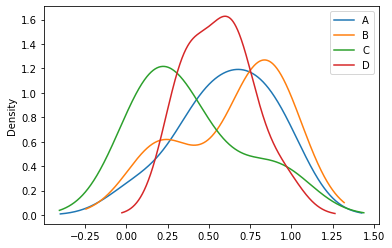

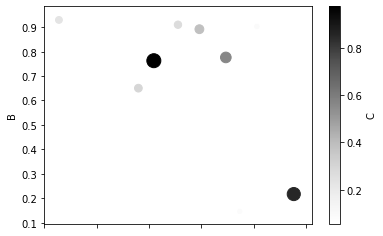

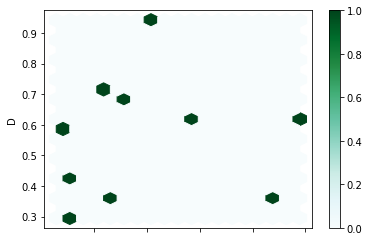

In [145]:
data.plot.kde(); #distribution plot
data.plot.scatter(x='A',y='B', #scatterplot x and y
                  c='C', #color of data points
                  s=data['C']*200); #size of data points
data.plot.hexbin(x='C',y='D', #hexbin x and y
                 gridsize=18); #hexagon dimensions

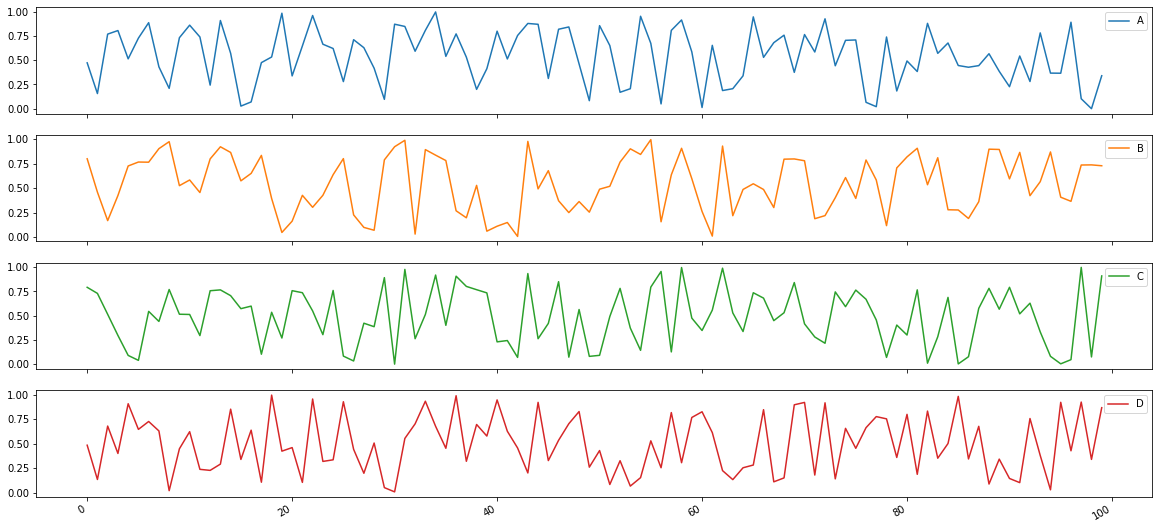

In [146]:
data = pd.DataFrame(np.random.rand(100, 4), columns=['A','B','C','D'])
data.plot(subplots=True,figsize=(20,10));